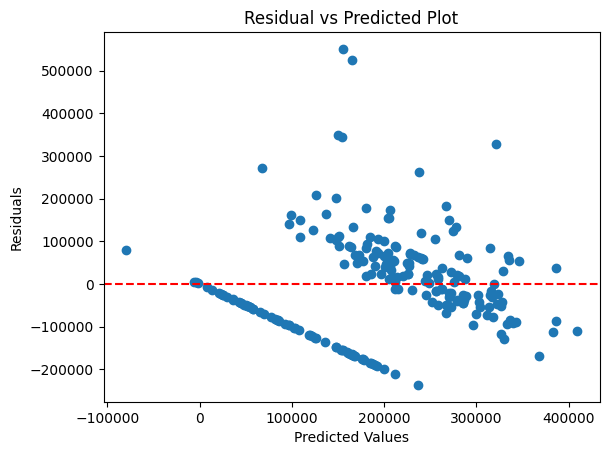

In [11]:
#Residual Plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Sample data (replace with your dataset)
df = pd.read_csv("PrePlacement.csv")  # e.g., placement data

X = df[['ssc_p', 'hsc_p','degree_p','etest_p','mba_p']]   # independent variables
y = df['salary']                # dependent variable

X_const = sm.add_constant(X)    # Add intercept
model = sm.OLS(y, X_const).fit()

residuals = model.resid
predicted = model.predict(X_const)

plt.scatter(predicted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual vs Predicted Plot")
plt.show()

In [9]:
#Statistical Test – Breusch-Pagan Test
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(residuals, X_const)

labels = ['Lagrange multiplier', 'p-value', 'f-value', 'f p-value']
result = dict(zip(labels, bp_test))
print(result)

{'Lagrange multiplier': 4.585366270520553, 'p-value': 0.4685435989941389, 'f-value': 0.9109077002418876, 'f p-value': 0.47484047550183595}


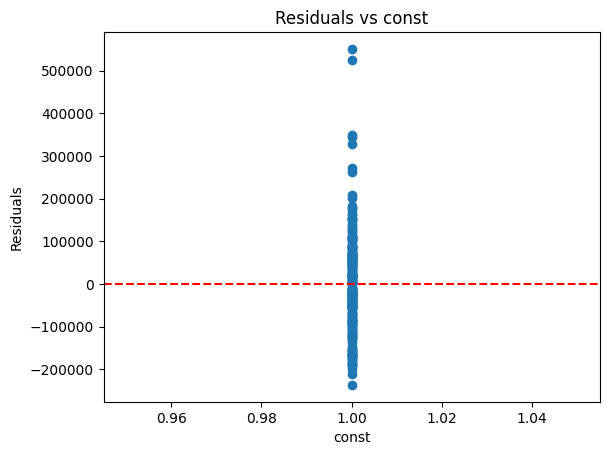

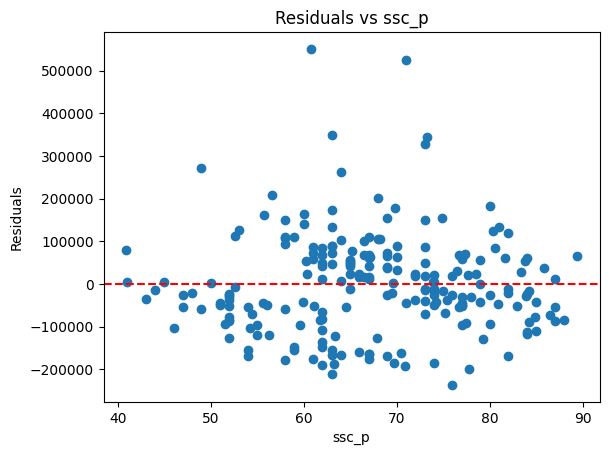

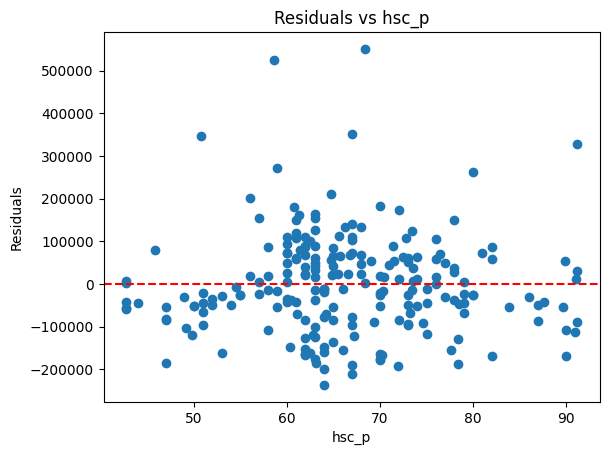

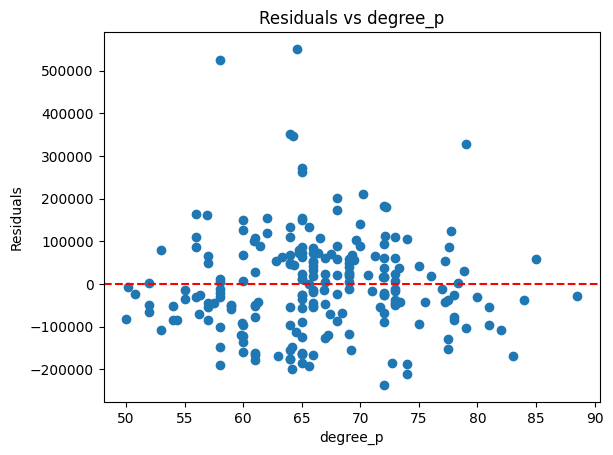

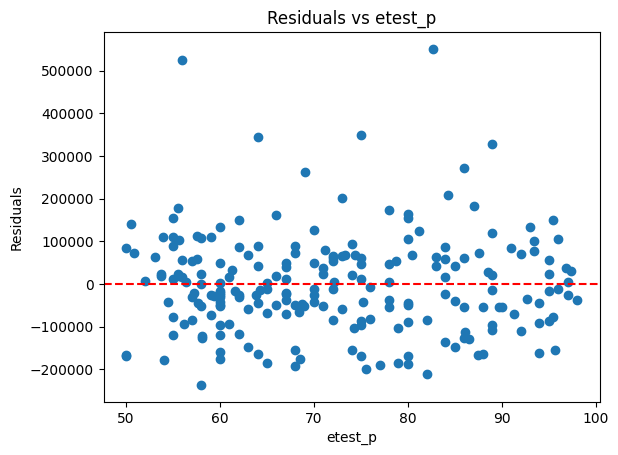

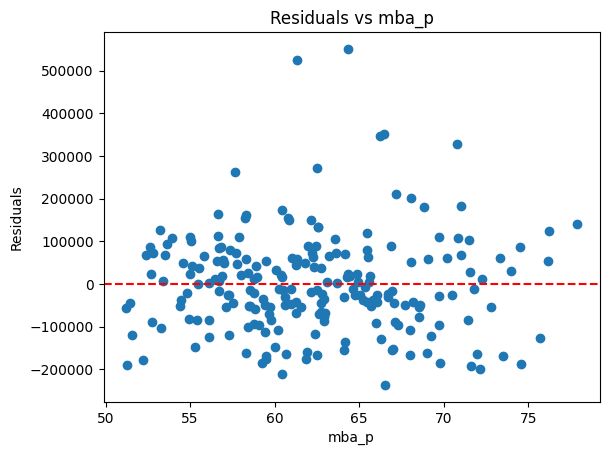

In [12]:
import matplotlib.pyplot as plt

for col in X_const.columns:
    plt.scatter(X_const[col], residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f"Residuals vs {col}")
    plt.xlabel(col)
    plt.ylabel("Residuals")
    plt.show()

In [13]:
from statsmodels.stats.diagnostic import het_white
white_test = het_white(residuals, X_const)
labels = ['Test Statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, white_test)))

{'Test Statistic': 24.01544981115761, 'p-value': 0.24171793175883655, 'f-value': 1.219731454391948, 'f p-value': 0.2413330764837899}
